In [1]:
#Širi prikaz u notebook-u
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pprint, genalg, json
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl

import matplotlib.pyplot as plt

In [3]:
py.init_notebook_mode(connected=True)

In [4]:
%matplotlib inline

In [5]:
with open('podaci.json', "r", encoding='utf-8-sig') as f:
    podaci = json.loads(f.read())

In [6]:
ulazni_podaci, generacije = genalg.glavna_funk(podaci, write_to_file=True, file_name="rezultati.json")

  1. generacija -> population average fit: 61.06678718235802, best chromosome fit: 400.26259127659847
  2. generacija -> population average fit: 61.06678718235802,  best chromosome fit: 400.26259127659847
  3. generacija -> population average fit: 130.7762393652253,  best chromosome fit: 509.32936225011326
  4. generacija -> population average fit: 103.43458051261314,  best chromosome fit: 499.5100336976187
  5. generacija -> population average fit: 144.3868490331875,  best chromosome fit: 589.6896154588115
  6. generacija -> population average fit: 231.9591726748005,  best chromosome fit: 589.6896154588115
  7. generacija -> population average fit: 477.4962051960364,  best chromosome fit: 589.6896154588115
  8. generacija -> population average fit: 589.6896154588115,  best chromosome fit: 589.6896154588115
  9. generacija -> population average fit: 589.6896154588115,  best chromosome fit: 589.6896154588115
 10. generacija -> population average fit: 589.6896154588115,  best chromosome 

In [7]:
pprint.pprint(ulazni_podaci)

{'dani': [1, 2, 3, 4, 5],
 'dvorane': {1: {'id': 1, 'kapacitet': 50, 'naziv': 'D1', 'spec': {'P', 'S'}},
             2: {'id': 2, 'kapacitet': 70, 'naziv': 'D2', 'spec': {'P', 'S'}},
             3: {'id': 3, 'kapacitet': 100, 'naziv': 'D3', 'spec': {'P'}},
             4: {'id': 4, 'kapacitet': 100, 'naziv': 'D4', 'spec': {'L'}}},
 'grupe': {1: {'id': 1, 'kapacitet': 30, 'naziv': 'G1'},
           2: {'id': 2, 'kapacitet': 25, 'naziv': 'G2'},
           3: {'id': 3, 'kapacitet': 70, 'naziv': 'G3'},
           4: {'id': 4, 'kapacitet': 45, 'naziv': 'G4'},
           5: {'id': 5, 'kapacitet': 30, 'naziv': 'G5'},
           6: {'id': 6, 'kapacitet': 50, 'naziv': 'G6'},
           7: {'id': 7, 'kapacitet': 70, 'naziv': 'G7'}},
 'kolegiji': {1: {'id': 1, 'naziv': 'Kolegij1'},
              2: {'id': 2, 'naziv': 'Kolegij2'},
              3: {'id': 3, 'naziv': 'Kolegij3'},
              4: {'id': 4, 'naziv': 'Kolegij4'},
              5: {'id': 5, 'naziv': 'Kolegij5'},
              6: {'i

In [8]:
pprint.pprint(genalg.json_rez(generacije['best'], ulazni_podaci))

('[{"fit": 589.6896154588115, "hard_dev": 0, "hard_pos": [], "jedinka": '
 '[{"dan": 2, "dvorana": "D2", "grupa": "G1", "kolegij": "Kolegij1", '
 '"profesor": "Ime1 Prezime1", "termin": [3, 4]}, {"dan": 1, "dvorana": "D2", '
 '"grupa": "G2", "kolegij": "Kolegij2", "profesor": "Ime1 Prezime1", "termin": '
 '[8, 9, 7]}, {"dan": 3, "dvorana": "D2", "grupa": "G3", "kolegij": '
 '"Kolegij5", "profesor": "Ime2 Prezime2", "termin": [2, 3]}, {"dan": 3, '
 '"dvorana": "D4", "grupa": "G2", "kolegij": "Kolegij1", "profesor": "Ime3 '
 'Prezime3", "termin": [3, 4, 5]}, {"dan": 2, "dvorana": "D2", "grupa": "G5", '
 '"kolegij": "Kolegij2", "profesor": "Ime5 Prezime5", "termin": [5, 6]}, '
 '{"dan": 4, "dvorana": "D1", "grupa": "G4", "kolegij": "Kolegij7", '
 '"profesor": "Ime3 Prezime3", "termin": [1, 2, 3]}, {"dan": 1, "dvorana": '
 '"D1", "grupa": "G6", "kolegij": "Kolegij6", "profesor": "Ime5 Prezime5", '
 '"termin": [10]}, {"dan": 3, "dvorana": "D1", "grupa": "G4", "kolegij": '
 '"Kolegij4", "pro

In [9]:
def plot_generation_fitness(ulazni_podaci):
    x = list(range(len(generacije['all'])))
    y = [populacija['avg_fit'] for populacija in generacije['all']]
    y_lower = [populacija['avg_fit'] - populacija['std_fit'] for populacija in generacije['all']]
    y_upper = [populacija['avg_fit'] + populacija['std_fit'] for populacija in generacije['all']]

    upper_bound = go.Scatter(
        name='Gornja vrijednost',
        x=x,
        y=y_upper,
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty')

    trace = go.Scatter(
        name='Prosječna vrijednost karakteristične funkcije',
        x=x,
        y=y,
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty')

    lower_bound = go.Scatter(
        name='Donja vrijednost',
        x=x,
        y=y_lower,
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines')

    # Trace order can be important
    # with continuous error bars
    data = [lower_bound, trace, upper_bound]

    layout = go.Layout(
        yaxis=dict(title='Fitness populacije', range=[0, 1000]),
        xaxis=dict(title='Generacije populacija', type='category'),
        title='Fitness populacija svih generacija',
        showlegend = False)

    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='fitness-all-generations')

In [10]:
plot_generation_fitness(ulazni_podaci)

In [11]:
def plot_fitness(ulazni_podaci):
    x = list(range(ulazni_podaci['parametri']['n_pop']))
    data = []
    for i in range(len(generacije['all'])):
        data.append(go.Bar(x=x, y=[jedinka['fit'] for jedinka in generacije['all'][i]['all']], visible = False, name="fitness"))
    data[0]['visible'] = True
    steps = []
    for i in range(len(data)):
        step = dict(method = 'update', 
                    args = [{'visible': [t == i for t in range(len(data))]}, 
                            {'title.text': f'Fitness populacija {i + 1}. generacije'}], 
                    label = f'{i + 1}. gen')
        steps.append(step)

    sliders = [dict(
        active=0,
        currentvalue={"prefix": "Generacija: "},
        pad={"t": 50},
        steps=steps,
        transition=dict(easing = "bounce-in-out")
    )]
    layout = go.Layout(
        yaxis=dict(title='Fitness jedinki', range=[0, 1000]),
        xaxis=dict(title='Jedinke generacija', type='category'),
        title=f'Fitness populacija 1. generacije',
        showlegend = False)

    fig = go.Figure(data=data, layout=layout)
    fig.update_layout(
        sliders=sliders
    )
    py.iplot(fig, filename='fitness-one-population')

In [12]:
plot_fitness(ulazni_podaci)

In [13]:
def plot_restrictions(ulazni_podaci):
    x = list(range(ulazni_podaci['parametri']['n_pop']))
    data = []
    for i in range(len(generacije['all'])):
        data.append(go.Bar(x=x, y=[len(jedinka['hard_pos']) for jedinka in generacije['all'][i]['all']], visible = False, name="hard"))
    for i in range(len(generacije['all'])):
        data.append(go.Bar(x=x, y=[len(jedinka['soft_pos']) for jedinka in generacije['all'][i]['all']], visible = False, name="soft"))
    data[0]['visible'] = data[len(generacije['all'])]['visible'] = True
    steps = []
    for i in range(len(data) // 2):
        step = dict(method = 'update', 
                    args = [{'visible': [t == i or len(data) // 2 + i == t for t in range(len(data))]}, 
                            {'title.text': f'Fitness populacija {i + 1}. generacije'}], 
                    label = f'{i + 1}. gen')
        steps.append(step)

    sliders = [dict(
        active=0,
        currentvalue={"prefix": "Generacija: "},
        pad={"t": 50},
        steps=steps,
        transition=dict(easing = "bounce-in-out")
    )]
    layout = go.Layout(
        yaxis=dict(title='Broj narušenih ograničenja'),
        xaxis=dict(title='Jedinke generacija', type='category'),
        title=f'Broj narušenih ograničenja 1. generacije',
        showlegend = True)

    fig = go.Figure(data=data, layout=layout)
    fig.update_layout(
        barmode='group',
        sliders=sliders
    )
    py.iplot(fig, filename='violation-one-population')

In [14]:
plot_restrictions(ulazni_podaci)

In [15]:
def plot_prof_pref(ulazni_podaci):
    def pref_matrix(ulazni_podaci, prof_id):
        podaci = {r['dan']: sorted(list(r['termini'])) for r in ulazni_podaci['preferencije']['profesori'][prof_id]['odabir']}
        podaci.update({d: [] for d in ulazni_podaci['dani'] if d not in podaci})
        return [[1.0 if j in podaci[i] else 0.0 for i in ulazni_podaci['dani']] for j in ulazni_podaci['termini']]

    fig = plt.figure()
    fig, ax = plt.subplots(1, len(ulazni_podaci['preferencije']['profesori']), figsize=(12,12))
    fig.suptitle("Preferencije termina profesora", fontsize="xx-large")
    for j in range(len(ulazni_podaci['preferencije']['profesori'])):
        ax[j].set_xticks([i - 0.5 for i in range(len(ulazni_podaci['dani']))], minor=True)
        ax[j].set_yticks([i - 0.5 for i in range(len(ulazni_podaci['termini']))], minor=True)
        ax[j].grid(which="minor", color="w", linestyle='-', linewidth=3)
        ax[j].tick_params(top=True, bottom=True, labeltop=True, labelbottom=True, right=True, left=True, labelright=True, labelleft=True)
        ax[j].set_xticklabels(['']+[str(d) for d in ulazni_podaci['dani']])
        ax[j].set_yticklabels(['']+[str(t) for t in ulazni_podaci['termini']])
        tick_spacing = 1
        ax[j].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
        ax[j].yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
        ax[j].set_title(f"Preferencije termina profesora '{ulazni_podaci['nastavnici'][ulazni_podaci['preferencije']['profesori'][j]['p_id']]['preime']}'")
        ax[j].set_xlabel('Dani')
        ax[j].set_ylabel('Termini')
        heatplot = ax[j].imshow(pref_matrix(ulazni_podaci, j), cmap=mpl.colors.LinearSegmentedColormap.from_list("", ["coral","lightgreen"]))

<Figure size 432x288 with 0 Axes>

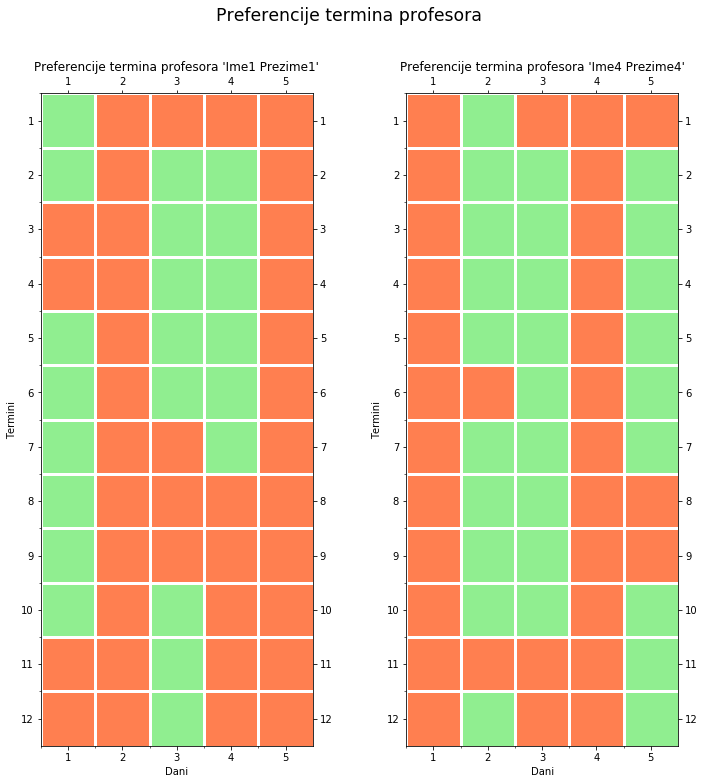

In [16]:
plot_prof_pref(ulazni_podaci)